In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('test-data.csv',parse_dates=True)
df.head()


,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0,0.0,17.477233,7.497754
1,DZA,Algeria,2019-12-31,0.754,0.0,0,0.0,17.596309,9.540639
2,ARM,Armenia,2019-12-31,0.755,0.0,0,0.0,14.901792,9.081095
3,AUS,Australia,2019-12-31,0.939,0.0,0,0.0,17.054184,10.706581
4,AUT,Austria,2019-12-31,0.908,0.0,0,0.0,16.013446,10.724075


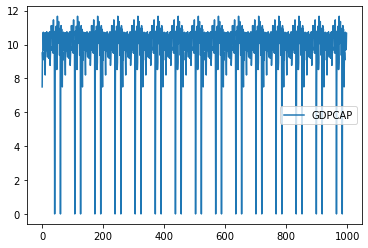

In [29]:
df_date_gdp = df.drop(columns=['CODE', 'COUNTRY', 'HDI', 'TC', 'TD', 'STI', 'POP'])
df_date_gdp.plot()

In [30]:
df_date_gdp['DATE'] = pd.to_datetime(df_date_gdp['DATE'])
df_date_gdp.set_index('DATE',inplace=True)
df_date_gdp.head()

,GDPCAP
DATE,
2019-12-31,7.497754
2019-12-31,9.540639
2019-12-31,9.081095
2019-12-31,10.706581
2019-12-31,10.724075


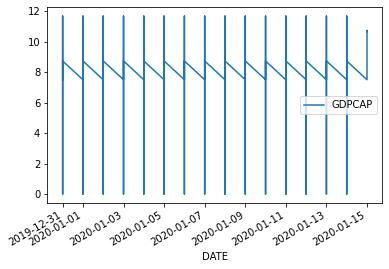

In [31]:
df_date_gdp.plot()

In [32]:
#testing if stationary data or not
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df_date_gdp['GDPCAP'])

def adfuller_test(gdp):
    result=adfuller(gdp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")


In [34]:
adfuller_test(df_date_gdp['GDPCAP'])

ADF Test Statistic : -9.08426480846232
p-value : 3.979315821869793e-15
#Lags Used : 21
Number of Observations : 977
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


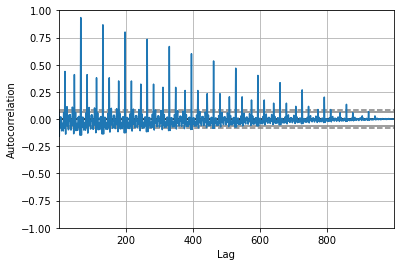

In [35]:
#autocorrelation graph
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_date_gdp['GDPCAP'])
plt.show()

In [36]:
 #select only if data is NON-SEASONAL
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(df_date_gdp['GDPCAP'],order=(1,1,1))
model_fit=model.fit()

model_fit.summary()

C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.GDPCAP   No. Observations:                  998
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2072.406
Method:                       css-mle   S.D. of innovations              1.924
Date:                Fri, 16 Apr 2021   AIC                           4152.811
Time:                        22:23:58   BIC                           4172.434
Sample:                             1   HQIC                          4160.270
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.975e-05      0.000     -0.088      0.930      -0.000       0.000
ar.L1.D.GDPCAP     0.0622      0.032      1.965      0.049       0.000       0.124
ma.L1.D.GDPCAP    -1.0000      0.002   -404.326      0.000      -1.005      -0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           16.0894           +0.0000j           16.0894            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
df_date_gdp['forecast']=model_fit.predict(start=600,end=800,dynamic=True)
df_date_gdp[['GDPCAP','forecast']].plot(figsize=(12,8))

#The forecast does not fit well on the graph. This implies that our data is seasonal

ValueError: cannot reindex from a duplicate axis

In [38]:
df_date_gdp= df_date_gdp.reset_index(drop=True)

df_date_gdp['forecast']=model_fit.predict(start=600,end=800,dynamic=True)
df_date_gdp[['GDPCAP','forecast']].plot(figsize=(12,8))

#The forecast does not fit well on the graph. This implies that our data is seasonal

ValueError: cannot reindex from a duplicate axis

In [39]:
df_date_gdp= df_date_gdp.reset_index(drop=True)

In [40]:
df_date_gdp['forecast']=model_fit.predict(start=600,end=800,dynamic=True)
df_date_gdp[['GDPCAP','forecast']].plot(figsize=(12,8))


ValueError: cannot reindex from a duplicate axis